<a href="https://colab.research.google.com/github/Poojitha-0407/FMML-2025/blob/main/Probability_%26_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [5]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    56
Heads    44
Name: count, dtype: int64


**Derived Probability Distributions**

In [6]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [7]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [8]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

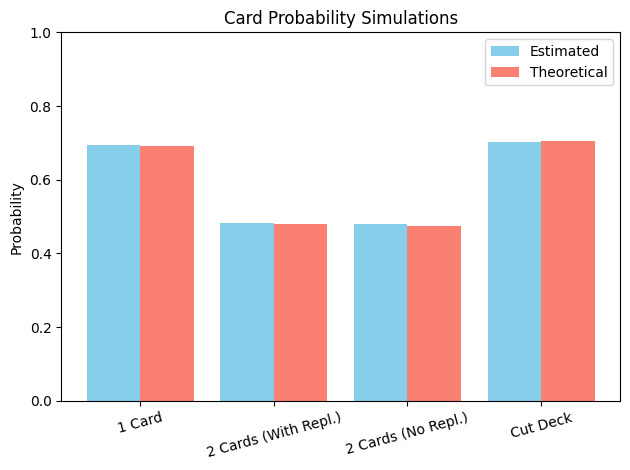

In [18]:
import random
import matplotlib.pyplot as plt

# Setup
deck = [str(i) for i in range(2, 11)] * 4 + ['A','J','Q','K'] * 4
sorted_deck = (['A'] + [str(i) for i in range(2, 11)] + ['J','Q','K']) * 4
trials = 10000
results = []

# 1. One card is numbered
results.append((
    sum(random.choice(deck).isdigit() for _ in range(trials)) / trials,
    36 / 52
))

# 2. Both cards numbered (with replacement)
results.append((
    sum(
        random.choice(deck).isdigit() and random.choice(deck).isdigit()
        for _ in range(trials)
    ) / trials,
    (36 / 52) ** 2
))

# 3. Both cards numbered (no replacement)
count = 0
for _ in range(trials):
    d = deck[:]
    c1 = random.choice(d); d.remove(c1)
    c2 = random.choice(d)
    if c1.isdigit() and c2.isdigit(): count += 1
results.append((count / trials, (36 / 52) * (35 / 51)))

# 4. Cut deck, bottom card is numbered
results.append((
    sum(sorted_deck[random.randint(1, 51)-1].isdigit() for _ in range(trials)) / trials,
    36 / 51
))

# Plot
labels = [
    "1 Card", "2 Cards (With Repl.)",
    "2 Cards (No Repl.)", "Cut Deck"
]
est = [r[0] for r in results]
theo = [r[1] for r in results]
x = range(4)

plt.bar([i - 0.2 for i in x], est, width=0.4, label='Estimated', color='skyblue')
plt.bar([i + 0.2 for i in x], theo, width=0.4, label='Theoretical', color='salmon')
plt.xticks(x, labels, rotation=15)
plt.ylabel("Probability")
plt.title("Card Probability Simulations")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


**Simulating to compute Expectation**

In [19]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

20 cards were thrown: 6C 5C 10S 5S 9H 2H 9C 8C 10D KD 8S 9D 5D 10H 9S KC 4C 7H 2D KS AH
0 cards were thrown: AD
8 cards were thrown: 9D 4C 8C JC 4D 8D 8H JH AC
17 cards were thrown: 7D 4H 10S 10D 5C QH 9H 3H 6H 2H KC 9S 8S 7S 8D 5D 2S AH
4 cards were thrown: 7C KD JC 2D AS
5 cards were thrown: 3S 10C JD 2H 10S AD
7 cards were thrown: 10D 9C 6H KS 9S 3C 4S AH
12 cards were thrown: 7S QH 2H 8C KH QD 4D 10S 3C 10H 2S 6D AS
8 cards were thrown: 9S 4D JD 7D 7C 8H 6C 8D AC
7 cards were thrown: KD 5D 7H QD JD 3C QH AH

9.5794 cards are tossed before we see the first ace!


**Visualize the Underlying Probability Mass Function**

In [20]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

**Standardisation**

In [7]:
import pandas as pd

grades = pd.read_csv("/content/grades.csv")
print(grades.shape)

numeric_grades = grades.drop(columns=['Name'])
numeric_grades.agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


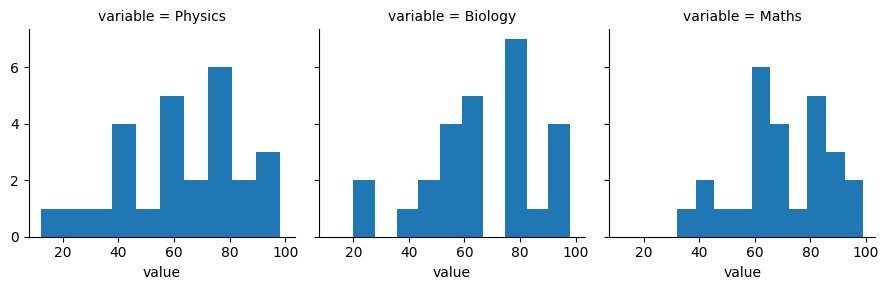

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt # Also import matplotlib as it's used by g.map

g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [10]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [11]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [12]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


**Binomial distribution**

In [13]:
from scipy.stats import binom

In [14]:
binom.pmf(k=5, n=5, p=0.25)

np.float64(0.0009765625)

In [15]:
binom.cdf(3, n=5, p=0.75)

np.float64(0.3671875)

**Normal distribution**

In [16]:
from scipy.stats import norm

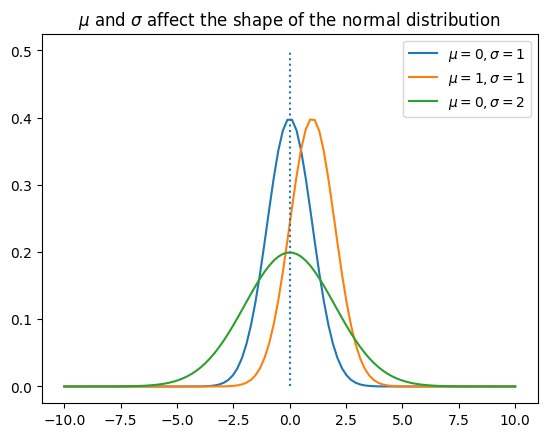

In [18]:
import numpy as np # Import numpy
from scipy.stats import norm
import matplotlib.pyplot as plt # Also import matplotlib

x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

**Programmatic solutions: percent point function**

In [19]:
norm.cdf(0)

np.float64(0.5)

In [20]:
norm.ppf(0.5)

np.float64(0.0)

**Poisson distribution**

In [21]:
from scipy.stats import poisson

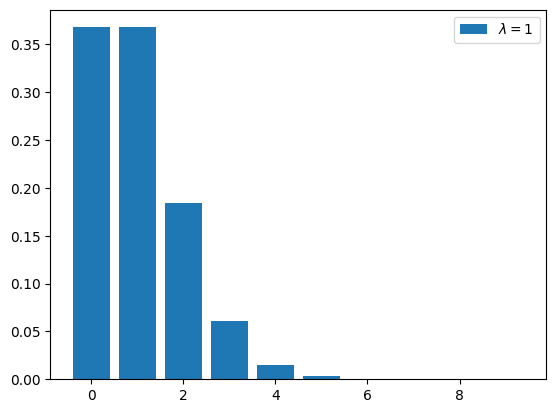

In [22]:

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [23]:
x @ f1

np.float64(0.999998874797402)

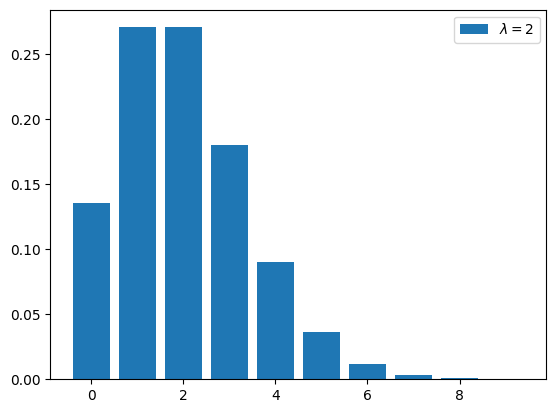

In [24]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [25]:
x @ f2

np.float64(1.999525105343477)

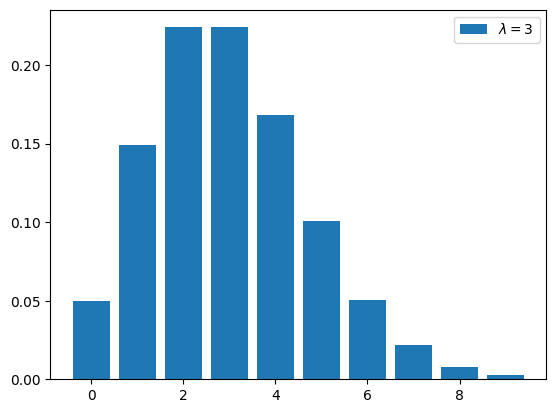

In [26]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [27]:
x @ f3

np.float64(2.9885910238149727)

**Central Limit Theorem**

In [28]:
from scipy.stats import poisson

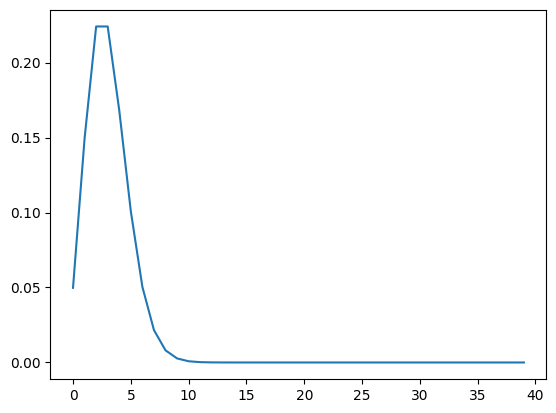

In [29]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  1.,   5.,  22.,  62., 111.,  93.,  71.,  24.,   7.,   4.]),
 array([1.65 , 1.915, 2.18 , 2.445, 2.71 , 2.975, 3.24 , 3.505, 3.77 ,
        4.035, 4.3  ]),
 <BarContainer object of 10 artists>)

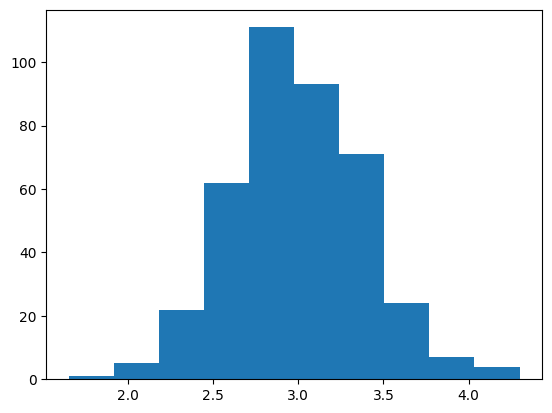

In [30]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

**Using Normal Distribution in Weight Initialization**

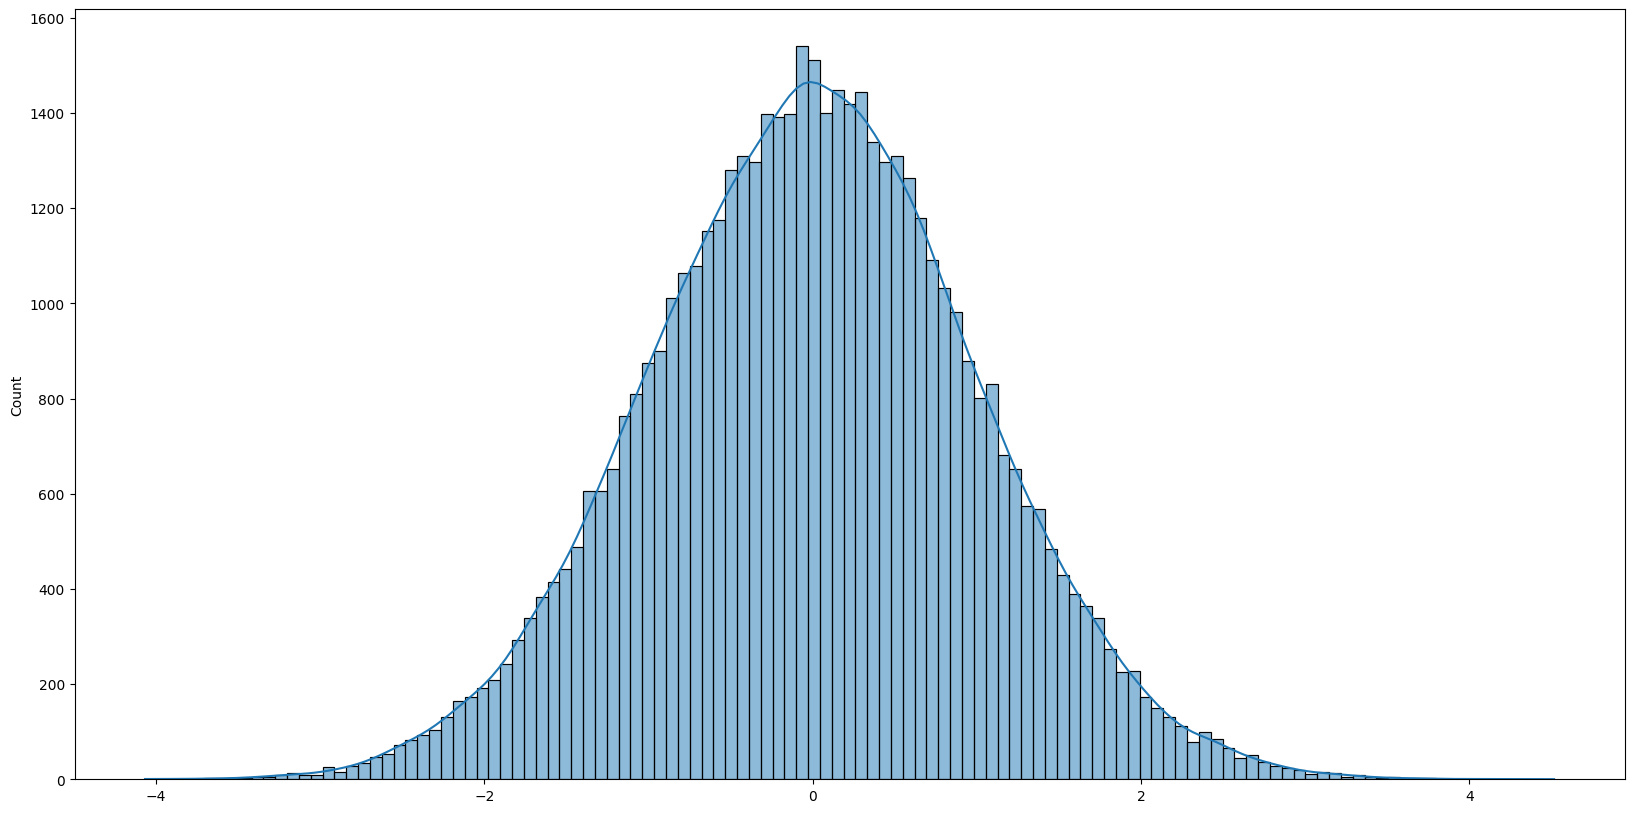

In [31]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

**A solid-liquid-gas example**
When no probability is involved, i.e. everything is known before hand, no information is gained from the experiment. All the results of the experiment could be predetermined. Look at the images below, which represent the molecules of a solid, which have low to no entropy (perfectly ordered crystal).

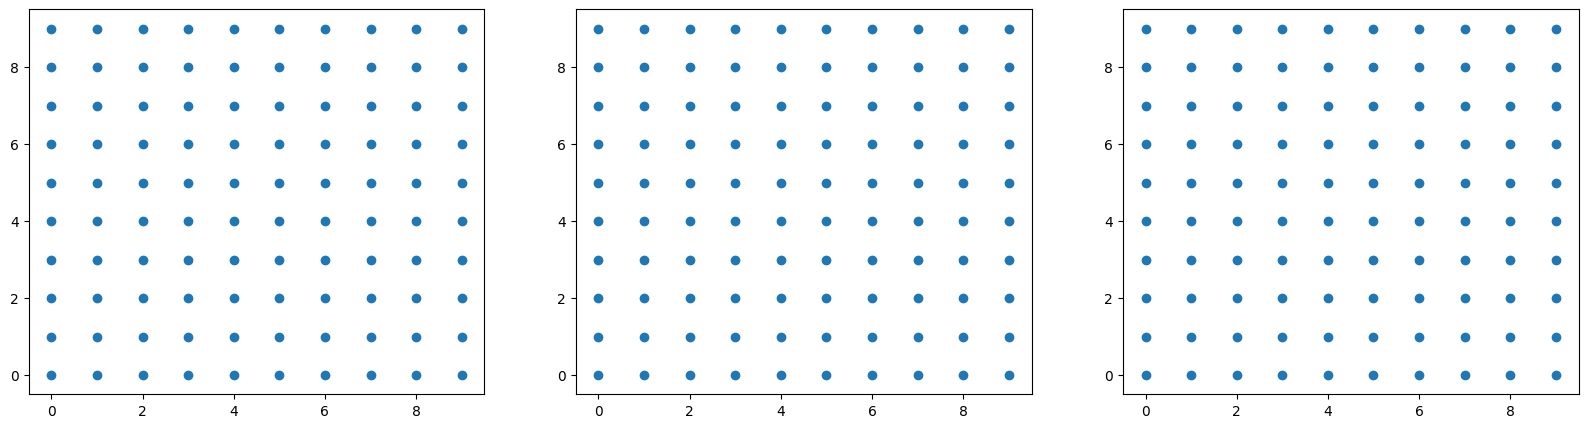

In [34]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show( )

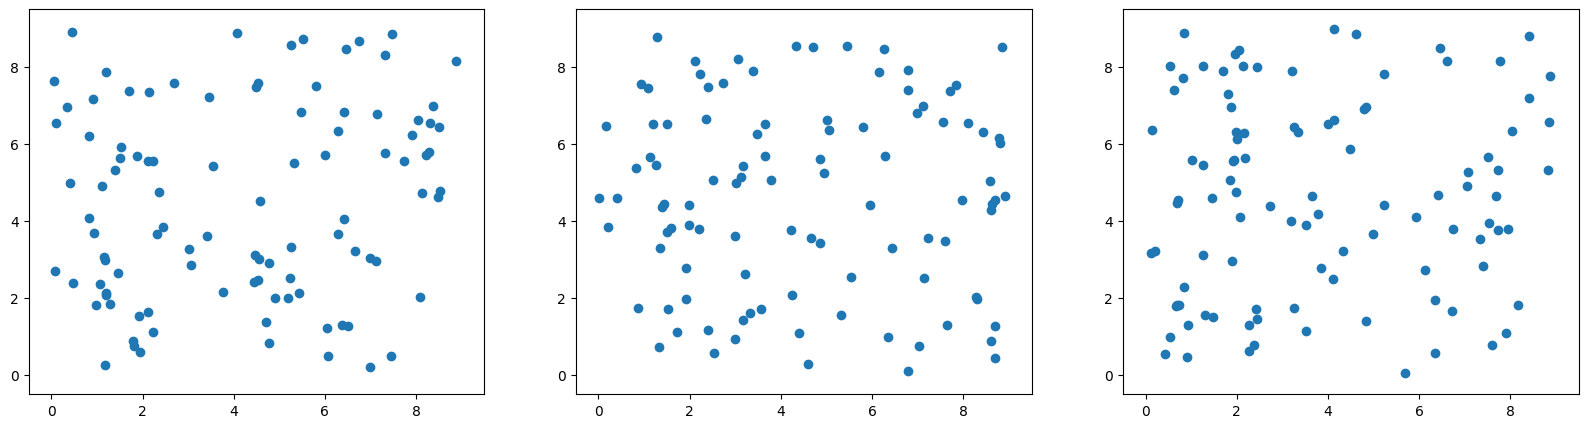

In [35]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

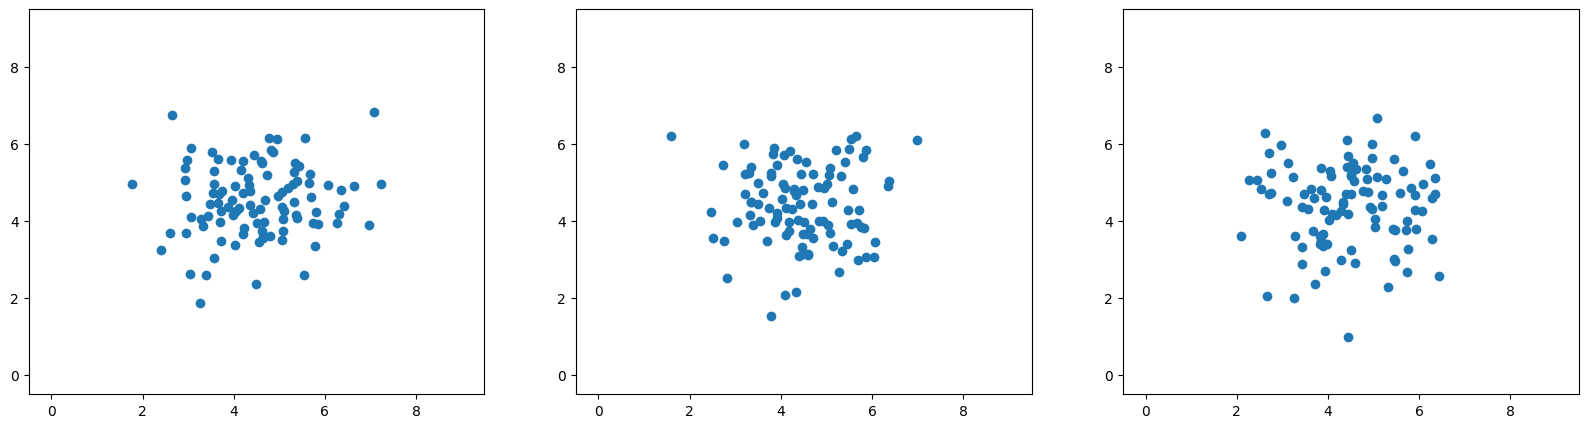

In [36]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()